### M00 PhysComp – Intro to Physical Computing
#### Exercise: Processing NY Taxi Trip Data
**Date:** 01/04/2019
<br/>
**Author:** Cisco • A C R O B O T I C 🦿
<br/>
**Contact Info:**  @[acrobotic](https://twitter.com/acrobotic) (Twitter) • support@acrobotic.com
<br/>
**Module Link:** [https://github.com/acrobotic/EduKits](https://github.com/acrobotic/EduKits)
<br/>
**Support:** [https://discord.gg/hbGxaa](https://discord.gg/hbGxaa)
<br/>
**Filename:** process_data_taxi.ipynb
<br/>
**Language:** Python 3 (Jupyter Notebook)

### Overview

The goal of this exercise is to process and visualize online data from taxi cab trips in New York.

### List of Materials

* Raspberry Pi

### Hardware Setup

None.

### Software Setup

Ensure you've followed the steps in `get_data_taxi.ipynb`.

* Include all the libraries we'll need for processing the data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* Declare variables for storing the location (relative paths) of the files in the operating system

In [42]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

* Use pandas to read the csv data into variables

In [43]:
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime',
                                               'dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])

* Use the dot notation to print out to an output cell the contents of the columns in the `data` object

In [44]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

* Assign specific data to variables for plotting, that is, the latitude and longitude of pickup locations

In [45]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude

* Define a function for converting latitude and longitude values to `(x,y)` pixel coordinates for visualizing the data 

In [46]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [47]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

* Generate a scatter plot of the latitude and longitude data in `(x,y)` coordinate space

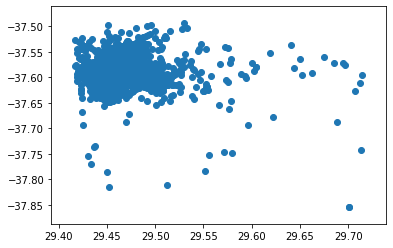

In [48]:
plt.scatter(px, py)

* Resize the figure and configure it for better visualization

(29.4, 29.55, -37.63, -37.54)

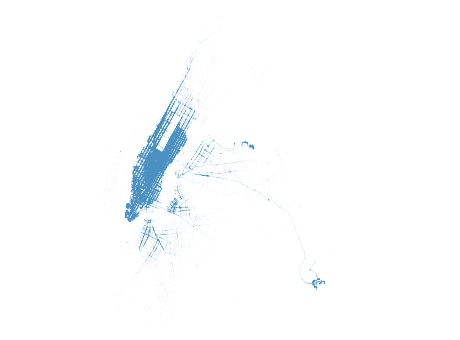

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha=.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off')